In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

#%pdb

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import loadfile, stack_weights, cr_calc

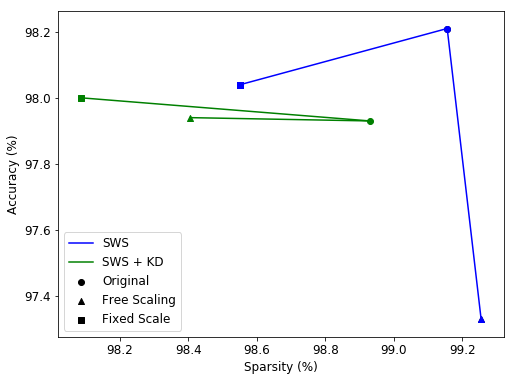

In [199]:
#SWS
#SWS w/ Scale
#SWS w/ Scale fixed
dset = "mnist"
model = "SWSModel"
#model = "LeNet_300_100"


#SWS KD
#SWS KD w/ Scale
#SWS KD w/ Scale fixed
if (model == "LeNet_300_100"):
    swsr = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, model, scaling=False, model_save_dir = "./files", dset = dset)
    swssr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", dset = dset)
    swssfr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)
    kdr = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, model, model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
    kdsr = loadfile(250, 10, 2500, 1250, 2e-6, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
    kdsfr = loadfile(250, 10, 2500, 1250, 2e-6, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)

else:
    swsr = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, model, scaling=False, model_save_dir = "../sws/files", dset = dset)
    swssr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", dset = dset)
    swssfr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)
    kdr = loadfile(250, 10, 2500, 1250, 2e-7, 3, 16, model, model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
    kdsr = loadfile(250, 10, 2500, 1250, 2.5e-7, 3, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
    kdsfr = loadfile(250, 10, 2500, 1250, 2e-7, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)
s_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
s_exp.loc[0] = (["sws", swsr["prune_acc"]["test"], swsr["sparsity"]])
s_exp.loc[1] = (["swss", swssr["prune_acc"]["test"], swssr["sparsity"]])
s_exp.loc[2] = (["swssf", swssfr["prune_acc"]["test"], swssfr["sparsity"]])
s_exp.loc[3] = (["kd", kdr["prune_acc"]["test"], kdr["sparsity"]])
s_exp.loc[4] = (["kds", kdsr["prune_acc"]["test"], kdsr["sparsity"]])
s_exp.loc[5] = (["kdsf", kdsfr["prune_acc"]["test"], kdsfr["sparsity"]])

s = s_exp.query("method == \'sws\'")
ss = s_exp.query("method == \'swss\'")
ssf = s_exp.query("method == \'swssf\'")
kd = s_exp.query("method == \'kd\'")
kds = s_exp.query("method == \'kds\'")
kdsf = s_exp.query("method == \'kdsf\'")


plt.figure(figsize=(8,6))
### Building Legend
plt.scatter(s['sp'], s['acc'],  color = 'k', marker = 'o', label = "Original")
plt.scatter(ss['sp'], ss['acc'],  color = 'k', marker = '^', label = "Free Scaling")
plt.scatter(ssf['sp'], ssf['acc'],  color = 'k', marker = 's', label = "Fixed Scale")

#Plot lines
plt.plot([float(s['sp']), float(ss['sp'])], [float(s['acc']), float(ss['acc'])], color = 'b', label = "SWS")
plt.plot([float(s['sp']), float(ssf['sp'])], [float(s['acc']), float(ssf['acc'])], color = 'b')
plt.plot([float(kd['sp']), float(kds['sp'])], [float(kd['acc']), float(kds['acc'])], color = 'g', label = "SWS + KD")
plt.plot([float(kd['sp']), float(kdsf['sp'])], [float(kd['acc']), float(kdsf['acc'])],color = 'g')

plt.legend()

#Plot scatter
plt.scatter(s['sp'], s['acc'],  color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['sp'], ss['acc'], color = 'b', marker = '^', label = "Free Scaling")
plt.scatter(ssf['sp'], ssf['acc'], color = 'b', marker = 's', label = "Fixed Scale")

plt.scatter(kd['sp'], kd['acc'], color = 'g', marker = 'o')
plt.scatter(kds['sp'], kds['acc'], color = 'g', marker = '^')
plt.scatter(kdsf['sp'], kdsf['acc'], color = 'g', marker = 's')

plt.ylabel('Accuracy (%)')
plt.xlabel('Sparsity (%)')

#plt.savefig('figs/swstau.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

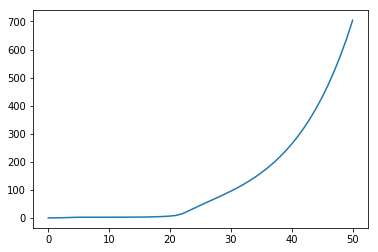

In [165]:
highlr = loadfile(250, 10, 2500, 1250, 2e-7, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE_LR", dset = dset)
plt.plot(highlr['scale'][:,0])

In [105]:
! dir

 Volume in drive C is OS
 Volume Serial Number is D21C-4FD8

 Directory of C:\Users\osman\OneDrive\MLSALT\MPhil Project\Code\localgit\NN_compression\writeup\scaling

12/08/2018  18:34    <DIR>          .
12/08/2018  18:34    <DIR>          ..
11/08/2018  17:51    <DIR>          .ipynb_checkpoints
12/08/2018  16:39            11,485 exp.py
12/08/2018  18:05    <DIR>          files
10/08/2018  12:55           125,818 scaling_exp-Copy1.ipynb
12/08/2018  14:18           244,222 scaling_exp.ipynb
12/08/2018  18:34            45,304 scaling_vis.ipynb
               4 File(s)        426,829 bytes
               4 Dir(s)  261,246,578,688 bytes free


In [ ]:
#SWS
#SWS w/ Scale
#SWS w/ Scale fixed
dset = "fashionmnist"
sws = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=False, model_save_dir = "./files", dset = dset)
swss = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files", dset = dset)
swssf = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)

#SWS KD
#SWS KD w/ Scale
#SWS KD w/ Scale fixed
kd = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
kds = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
kdsf = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)

s_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
s_exp.loc[0] = (["sws", sws["prune_acc"]["test"], sws["sparsity"]])
s_exp.loc[1] = (["swss", swss["prune_acc"]["test"], swss["sparsity"]])
s_exp.loc[2] = (["swssf", swssf["prune_acc"]["test"], swssf["sparsity"]])
s_exp.loc[3] = (["kd", kd["prune_acc"]["test"], kd["sparsity"]])
s_exp.loc[4] = (["kds", kds["prune_acc"]["test"], kds["sparsity"]])
s_exp.loc[5] = (["kdsf", kdsf["prune_acc"]["test"], kdsf["sparsity"]])

s = s_exp.query("method == \'sws\'")
ss = s_exp.query("method == \'swss\'")
ssf = s_exp.query("method == \'swssf\'")
kd = s_exp.query("method == \'kd\'")
kds = s_exp.query("method == \'kds\'")
kdsf = s_exp.query("method == \'kdsf\'")

plt.scatter(s['acc'], s['sp'], color = 'k', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'k', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'k', marker = 's', label = "Fixed Scale")

plt.plot([float(s['acc']), float(ss['acc'])], [float(s['sp']), float(ss['sp'])], color = 'b', label = "SWS")
plt.plot([float(s['acc']), float(ssf['acc'])], [float(s['sp']), float(ssf['sp'])], color = 'b')
plt.plot([float(kd['acc']), float(kds['acc'])], [float(kd['sp']), float(kds['sp'])], color = 'g', label = "SWS + KD")
plt.plot([float(kd['acc']), float(kdsf['acc'])], [float(kd['sp']), float(kdsf['sp'])], color = 'g')

plt.legend()

plt.scatter(s['acc'], s['sp'], color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'b', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'b', marker = 's', label = "Fixed Scale")

plt.scatter(s['acc'], s['sp'], color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'b', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'b', marker = 's', label = "Fixed Scale")

plt.scatter(kd['acc'], kd['sp'], color = 'g', marker = 'o')
plt.scatter(kds['acc'], kds['sp'], color = 'g', marker = '^')
plt.scatter(kdsf['acc'], kdsf['sp'], color = 'g', marker = 's')



In [ ]:
#SWS
#SWS w/ Scale
#SWS w/ Scale fixed
dset = "fashionmnist"
sws = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=False, model_save_dir = "./files", dset = dset)
swss = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files", dset = dset)
swssf = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)

#SWS KD
#SWS KD w/ Scale
#SWS KD w/ Scale fixed
kd = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
kds = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
kdsf = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)

s_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
s_exp.loc[0] = (["sws", sws["prune_acc"]["test"], sws["sparsity"]])
s_exp.loc[1] = (["swss", swss["prune_acc"]["test"], swss["sparsity"]])
s_exp.loc[2] = (["swssf", swssf["prune_acc"]["test"], swssf["sparsity"]])
s_exp.loc[3] = (["kd", kd["prune_acc"]["test"], kd["sparsity"]])
s_exp.loc[4] = (["kds", kds["prune_acc"]["test"], kds["sparsity"]])
s_exp.loc[5] = (["kdsf", kdsf["prune_acc"]["test"], kdsf["sparsity"]])

s = s_exp.query("method == \'sws\'")
ss = s_exp.query("method == \'swss\'")
ssf = s_exp.query("method == \'swssf\'")
kd = s_exp.query("method == \'kd\'")
kds = s_exp.query("method == \'kds\'")
kdsf = s_exp.query("method == \'kdsf\'")

plt.scatter(s['acc'], s['sp'], color = 'k', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'k', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'k', marker = 's', label = "Fixed Scale")

plt.plot([float(s['acc']), float(ss['acc'])], [float(s['sp']), float(ss['sp'])], color = 'b', label = "SWS")
plt.plot([float(s['acc']), float(ssf['acc'])], [float(s['sp']), float(ssf['sp'])], color = 'b')
plt.plot([float(kd['acc']), float(kds['acc'])], [float(kd['sp']), float(kds['sp'])], color = 'g', label = "SWS + KD")
plt.plot([float(kd['acc']), float(kdsf['acc'])], [float(kd['sp']), float(kdsf['sp'])], color = 'g')

plt.legend()

plt.scatter(s['acc'], s['sp'], color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'b', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'b', marker = 's', label = "Fixed Scale")

plt.scatter(s['acc'], s['sp'], color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'b', marker = '^', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'b', marker = 's', label = "Fixed Scale")

plt.scatter(kd['acc'], kd['sp'], color = 'g', marker = 'o')
plt.scatter(kds['acc'], kds['sp'], color = 'g', marker = '^')
plt.scatter(kdsf['acc'], kdsf['sp'], color = 'g', marker = 's')



### Init std dev

In [40]:
dev = {}
for layer in sws['init_weights']:
    dev[layer] = np.std(sws['init_weights'][layer])

for layer in dev:
    print (dev[layer]/dev['fc1'])

1.0
1.13086
1.456649


### Increasing Scale

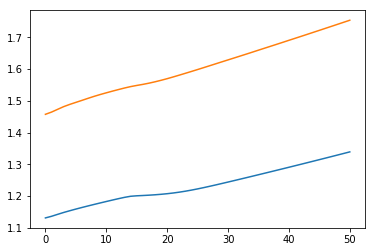

In [49]:
with open("./files/mnist_retrain_res_LeNet_300_100_m250_zm2500_r50_t1e-06_m16_kdT5_s_full_MSE_LR.p", "rb") as f:
    scres = pickle.load(f)
plt.plot(scres['scale'])